# GemPy test models
This small presentation notebook will cover some simple models build in [GemPy](https://github.com/cgre-aachen/gempy) to showcase necessary inputs and the behaviour of some of its features.  
1. Minimum required input data  
2. How Series work  
    2.1 Model 2 layers in 1 Series  
    2.2 Model 2 layers in 2 Series  
3. Position of orientation data  
4. Fault relations  
5. Onlap relations  
6. Topography  

In [1]:
import sys, os
sys.path.append("../..")
import gempy as gp
%matplotlib inline

# Minimum required input data  
GemPy needs two different input data for creating a model: *interface* and *orientation* data. 
*Interfaces* can easily be understood as the ... well ... interface between two geological units. These can, e.g. be mapped in the Field.  
So can *Orientation* measurements (usually with a compass). They comprise two angles here, the `azimuth` $\sigma$ and `dip` $\varphi$  
![orientation_wiki](https://upload.wikimedia.org/wikipedia/commons/8/80/Streichbild.svg)  

| x  |  y |  z |  azimuth | dip  | polarity  |  Formation |
|--:|--:|--:|--:|--:|--:|---|
| 300  | 250  | 545  | 90  | 10  |  1 | sandstone  |
|  300 |  550 |  680 |  90 | 15  |  1 | limestone  |

## Onlap test

In [2]:
geo_model = gp.create_model('Test_model')

In [3]:
gp.init_data(geo_model, [0, 10., 0, 2., 0, 5.], [100, 3, 100],
            path_o = 'data/05_toy_fold_unconformity_orientations.csv',
             path_i = 'data/05_toy_fold_unconformity_interfaces.csv', 
             default_values=True);

Active grids: ['regular']


/Users/varga/.conda/envs/gempy/lib/python3.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [4]:
geo_model.surfaces

,surface,series,order_surfaces,isActive,color,id
0,Basefold,Default series,1,True,#015482,1
1,Topfold,Default series,2,True,#9f0052,2
2,Inclined,Default series,3,True,#ffbe00,3
3,Flat,Default series,4,True,#728f02,4
4,basement,Basement,1,True,#443988,5


In [5]:
gp.map_series_to_surfaces(geo_model,
                         {"Flat_Series":'Flat',
                          "Inclined_Series":'Inclined',
                          "Fold_Series": ('Basefold', 'Topfold', 'basement')})

,surface,series,order_surfaces,isActive,color,id
3,Flat,Flat_Series,1,True,#728f02,1
2,Inclined,Inclined_Series,1,True,#ffbe00,2
0,Basefold,Fold_Series,1,True,#015482,3
1,Topfold,Fold_Series,2,True,#9f0052,4
4,basement,Fold_Series,3,True,#443988,5


In [6]:
geo_model.surfaces

,surface,series,order_surfaces,isActive,color,id
3,Flat,Flat_Series,1,True,#728f02,1
2,Inclined,Inclined_Series,1,True,#ffbe00,2
0,Basefold,Fold_Series,1,True,#015482,3
1,Topfold,Fold_Series,2,True,#9f0052,4
4,basement,Fold_Series,3,True,#443988,5


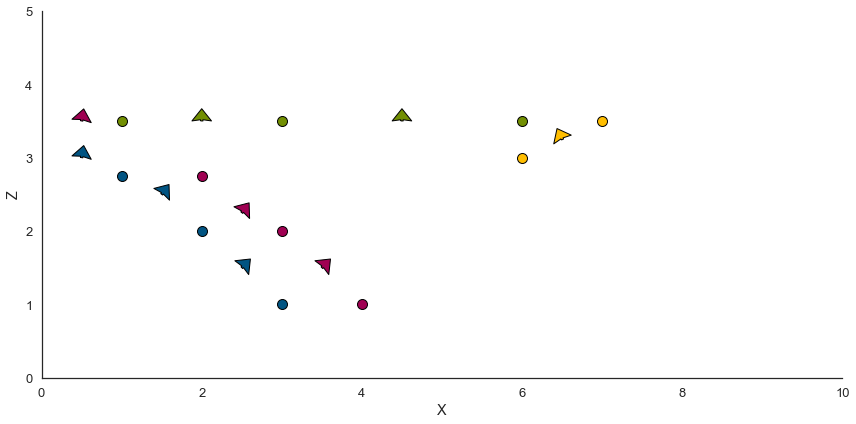

In [7]:
gp.plot.plot_data(geo_model, direction='y')

In [8]:
geo_model.series

,order_series,BottomRelation,isActive
Flat_Series,1,Erosion,NaN
Inclined_Series,2,Erosion,NaN
Fold_Series,3,Erosion,NaN


In [9]:
# Create the theano model
gp.set_interpolation_data(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=['nsle'])

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!


In [10]:
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)

nsle __str__ = 1
nsle __str__ = 1
nsle __str__ = 1


/Users/varga/.conda/envs/gempy/lib/python3.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


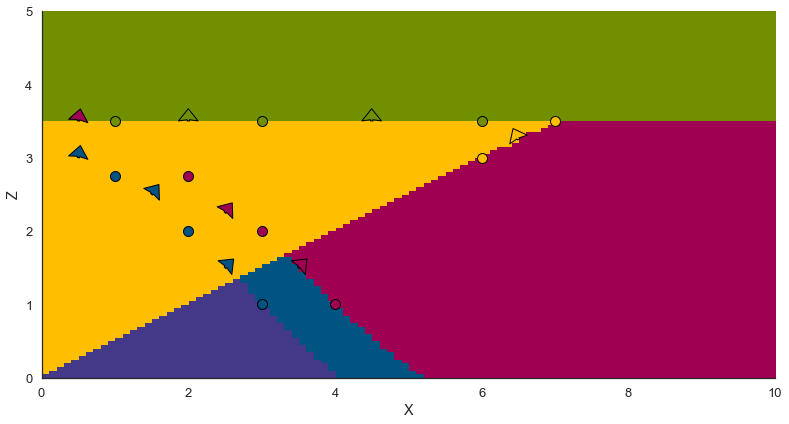

In [11]:
gp.plot.plot_section(geo_model, cell_number=2, direction='y')

## Inclined as ONLAP

In [12]:
# so let's set the Pregraben_Series to Onlap
geo_model.set_bottom_relation('Inclined_Series', bottom_relation='Onlap')
geo_model.set_bottom_relation('Flat_Series', bottom_relation='Erosion')

,order_series,BottomRelation,isActive
Flat_Series,1,Erosion,True
Inclined_Series,2,Onlap,True
Fold_Series,3,Erosion,True


In [13]:
# # Create the theano model
# gp.set_interpolation_data(geo_model,
#                          compile_theano=True,
#                          theano_optimizer='fast_compile',
#                          verbose=[])
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)

nsle __str__ = 1
nsle __str__ = 1
nsle __str__ = 1


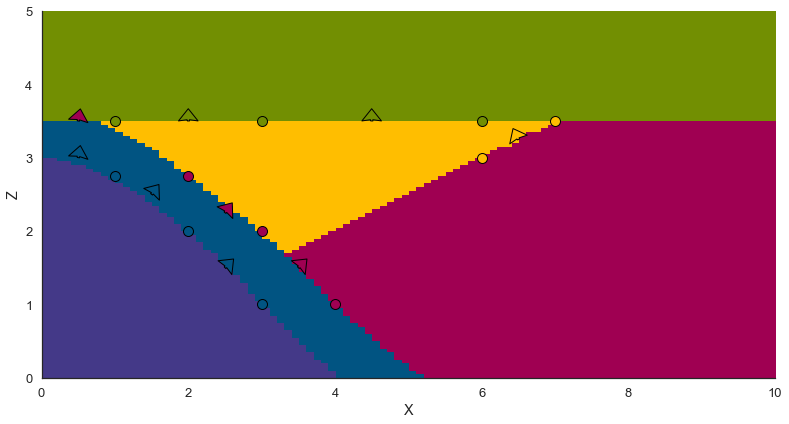

In [14]:
gp.plot.plot_section(geo_model, cell_number=2, direction='y')

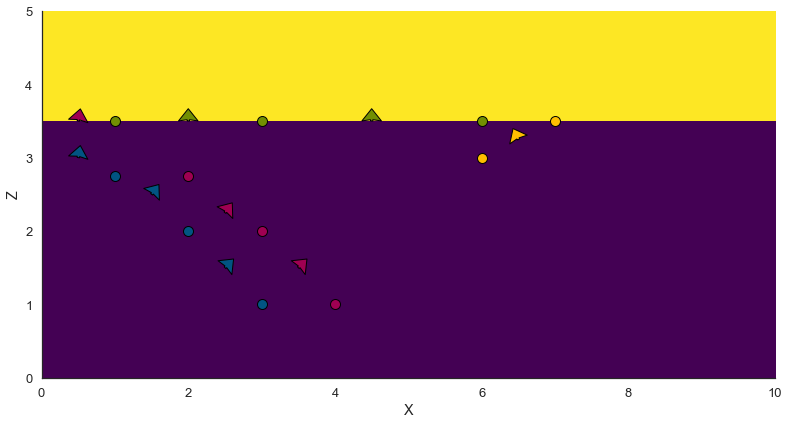

In [15]:
gp.plot.plot_section(geo_model, cell_number=2, block=geo_model.solutions.mask_matrix[0])

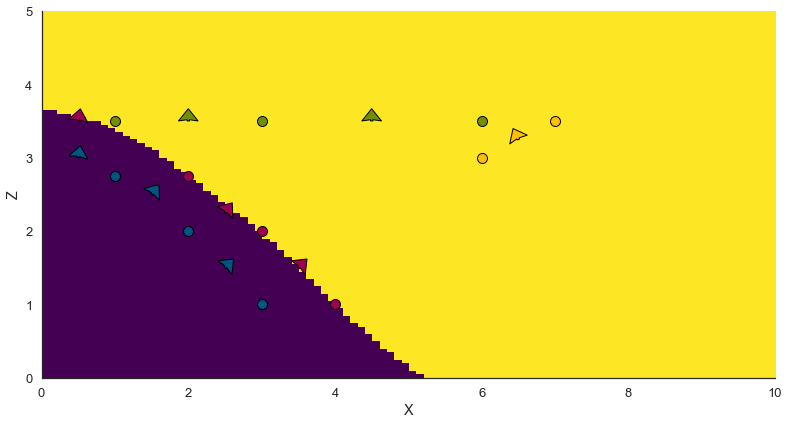

In [16]:
gp.plot.plot_section(geo_model, cell_number=2, block=geo_model.solutions.mask_matrix[1])

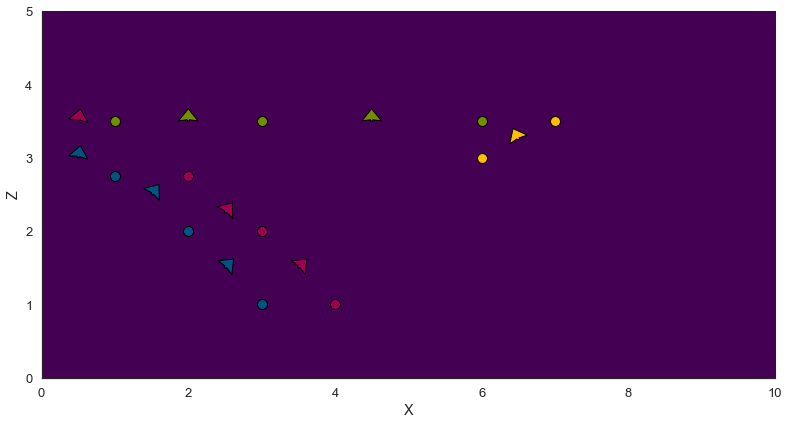

In [17]:
gp.plot.plot_section(geo_model, cell_number=2, block=geo_model.solutions.mask_matrix[2])

In [18]:
geo_model.set_bottom_relation(['Flat_Series'], bottom_relation='Onlap')

,order_series,BottomRelation,isActive
Flat_Series,1,Onlap,True
Inclined_Series,2,Onlap,True
Fold_Series,3,Erosion,True


In [19]:
geo_model.set_bottom_relation(['Inclined_Series'],
                              bottom_relation='Erosion')

,order_series,BottomRelation,isActive
Flat_Series,1,Onlap,True
Inclined_Series,2,Erosion,True
Fold_Series,3,Erosion,True


In [20]:
sol = gp.compute_model(geo_model, compute_mesh=False)

nsle __str__ = 1
nsle __str__ = 1
nsle __str__ = 1


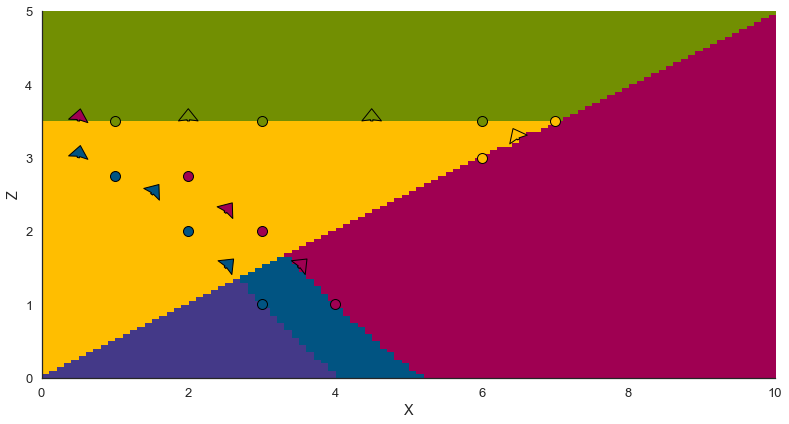

In [21]:
gp.plot.plot_section(geo_model, cell_number=2, direction='y')

## Inclined and Flat as ONLAP

In [22]:
# so let's set the Pregraben_Series to Onlap
geo_model.set_bottom_relation(['Flat_Series','Inclined_Series'], bottom_relation='Onlap')

,order_series,BottomRelation,isActive
Flat_Series,1,Onlap,True
Inclined_Series,2,Onlap,True
Fold_Series,3,Erosion,True


In [23]:
# Create the theano model
# gp.set_interpolation_data(geo_model,
#                          compile_theano=True,
#                          theano_optimizer='fast_compile',
#                          verbose=[])

In [25]:
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)

nsle __str__ = 1
nsle __str__ = 1
nsle __str__ = 2


In [26]:
geo_model.surfaces

,surface,series,order_surfaces,isActive,color,id
3,Flat,Flat_Series,1,True,#728f02,1
2,Inclined,Inclined_Series,1,True,#ffbe00,2
1,Topfold,Fold_Series,1,True,#9f0052,3
0,Basefold,Fold_Series,2,True,#015482,4
4,basement,Fold_Series,3,True,#443988,5


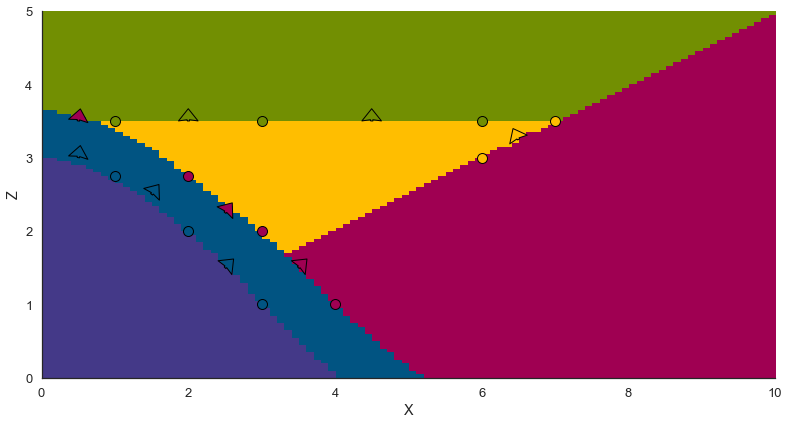

In [27]:
gp.plot.plot_section(geo_model, cell_number=2, direction='y')

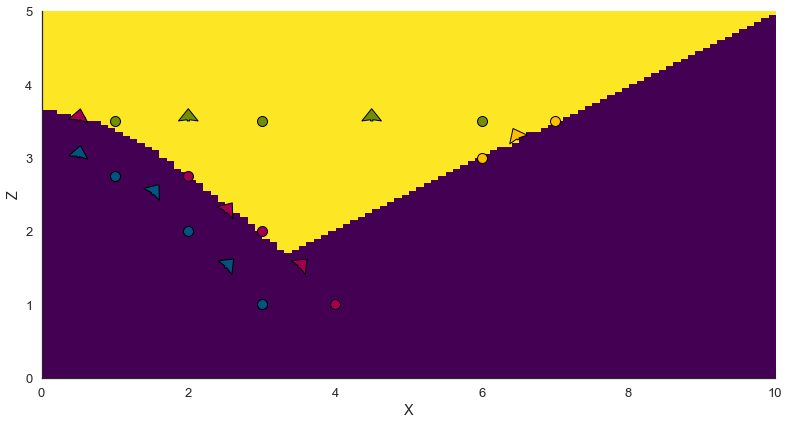

In [28]:
gp.plot.plot_section(geo_model, cell_number=2, block=geo_model.solutions.mask_matrix[0])

array([False, False, False, ...,  True,  True,  True])

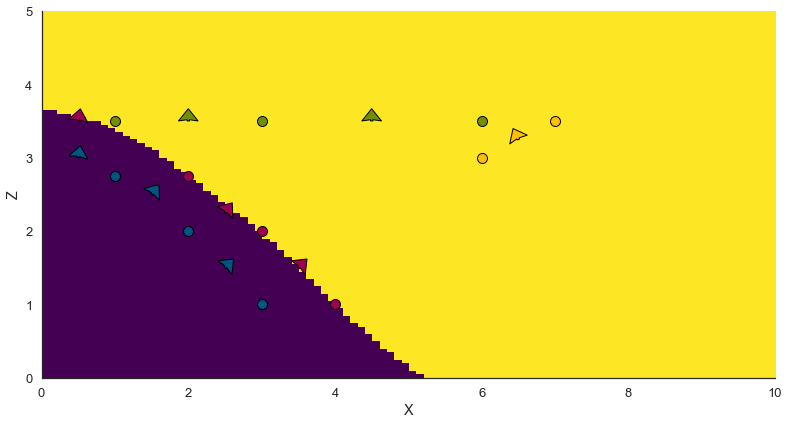

In [29]:
gp.plot.plot_section(geo_model, cell_number=2, block=geo_model.solutions.mask_matrix[1])
geo_model.solutions.mask_matrix[1]

array([ True,  True,  True, ...,  True,  True,  True])

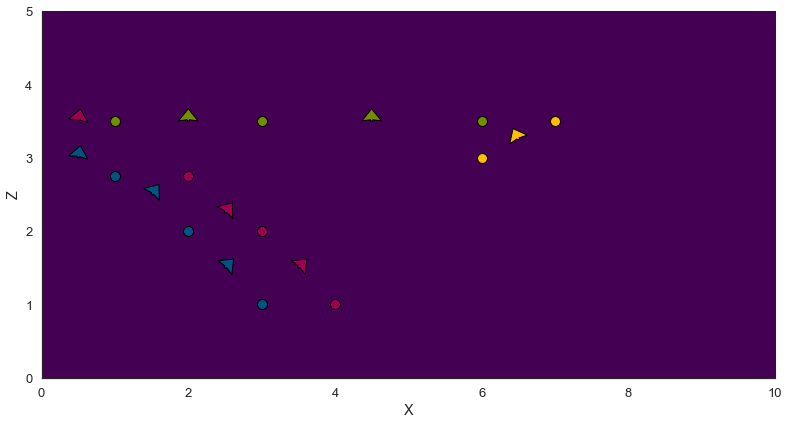

In [30]:
gp.plot.plot_section(geo_model, cell_number=2, block=geo_model.solutions.mask_matrix[2])
geo_model.solutions.mask_matrix[2]